You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

penguins_df = pd.read_csv("data/penguins.csv")

Cleaning data

In [338]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [339]:
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [340]:
penguins_df.dropna(inplace=True)
print(penguins_df.shape)

(335, 5)


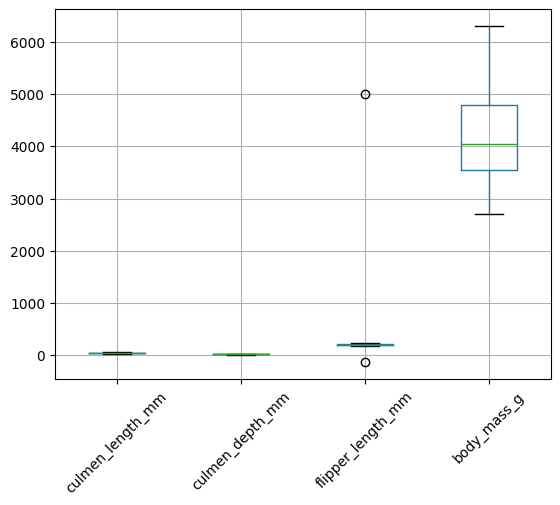

In [341]:
penguins_df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [342]:
penguins_clean = penguins_df[(penguins_df['flipper_length_mm'] < 4000) & (penguins_df['flipper_length_mm'] > 0)]

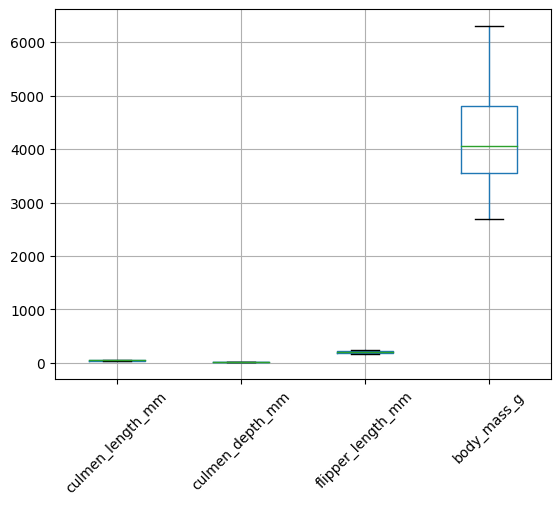

In [343]:
penguins_clean.boxplot()
plt.xticks(rotation=45)
plt.show()

Preprocessing before modeling

In [344]:
penguins_w_dummies = pd.get_dummies(penguins_clean, drop_first=True)
penguins_w_dummies

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0
340,46.8,14.3,215.0,4850.0,1,0
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,1,0


Standatdizing data bafore modeling (mean = 0, variance = 1)

In [345]:
scaler = StandardScaler()

penguins_preprocessed = scaler.fit_transform(penguins_w_dummies)

Performing dimension reduction with PCA (Prinsipal Component Analysis)

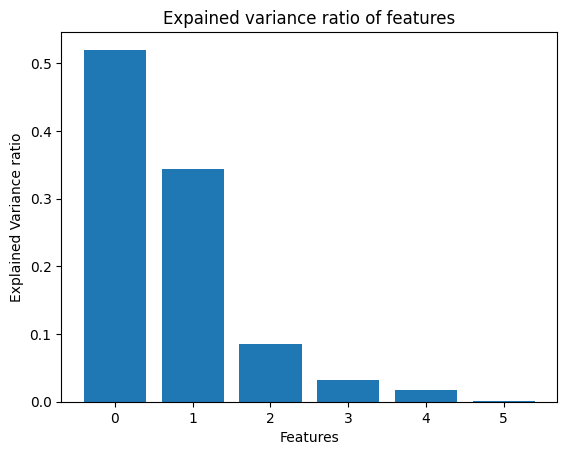

2


In [346]:
pca = PCA()
pca.fit(penguins_preprocessed)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('Features')
plt.ylabel('Explained Variance ratio')
plt.title('Expained variance ratio of features')
plt.show()

n_components = len([variance for variance in pca.explained_variance_ratio_ if variance > 0.1])
print(n_components)

In [347]:
pca_new = PCA(n_components=n_components, random_state=42)
penguins_PCA= pd.DataFrame(pca_new.fit_transform(penguins_preprocessed))

print(penguins_PCA.head())

          0         1
0 -0.729521 -2.097192
1 -1.929304  0.412150
2 -1.953525  0.308485
3 -2.288178 -0.158278
4 -0.621822 -2.514020


Performing clustering 

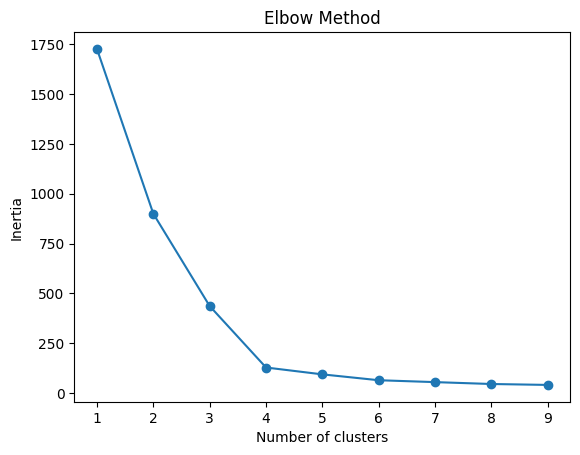

In [348]:
inertia = []

for k in range (1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

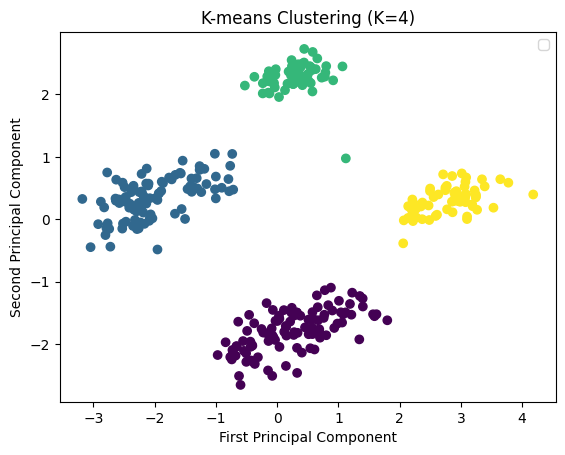

In [349]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)

plt.scatter(penguins_PCA[0], penguins_PCA[1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

In [350]:
penguins_clean['label'] = k_means.labels_

numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066
